<a href="https://colab.research.google.com/github/hilmanrozaini/UKM_SDA/blob/main/Assgn2_Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STQD6324 Data Management - Question1 Wordcount**

---



    Prepared By :
    Muhammad Hilman Bin Rozaini
    Nur Mardhiah Bt Zulkhairi
    Syed Norman Daniel Bin Syed Mahadir
    Tan Su Rong
    Tan Ting Fui

# **Introduction**

---



Word cloud is a graphical representation of words frequency depicted in different sizes. The words with higher frequency will appear bigger and bolder in the word cloud. This also implies that the more it is being mentioned in the text, the more important the word is.

Word cloud is commonly generated from a word frequency table. While data preprocessing from inital raw text to finally obtaining the word frequency table for plotting of word could can be performed solely via Python or R, in this exercise Apache Pig is specifically selected to perform data preprocessing.

## **Data Source**

---



Three books are downloaded from Project Gutenberg at https://www.gutenberg.org/

The three downloaded books are:-


Book Title | Author | Ebook No     
--- | --- |---
Alice’s Adventures in Wonderland | Lewis Carroll | 11
The Strange Case of Dr. Jekyll and Mr. Hyde | Robert Louis Stevenson | 42
Dracula | Bram Stoker | 345

# **Apache Pig Codes for Data Pre-processing**

---



Books = LOAD '/user/maria_dev/Books' USING TextLoader() AS (line:Chararray);

Words = FOREACH Books GENERATE FLATTEN(TOKENIZE(REPLACE(LOWER(TRIM(line)),'[\\p{Punct},\\p{Cntrl},\\p{Digit}]',''))) AS word;

Word_Group = GROUP Words BY word;

wordcount = FOREACH Word_Group GENERATE group,COUNT(Words) AS countWords;

DUMP wordcount;


##**Codes Explanation**

---



#### **Code1**
**Books = LOAD '/user/maria_dev/Books' USING TextLoader() AS (line:Chararray);**

3 books in the txt format is stored in the folder 'Books'.
This commands is used to load data from the txt files into a table named Books, where each line of the file is stored as a character array in the field line.

#### **Code2**
**Words = FOREACH Books GENERATE FLATTEN(TOKENIZE(REPLACE(LOWER(TRIM(line)),'[\p{Punct},\p{Cntrl},\p{Digit}]',''))) AS word;**

The code takes each line from the table Books, and performs a series of transformations or cleaning. The line is trimmed and converted to lowercase. Punctuations, control characters, and digits are removed using regular expression pattern matching. Finally the text sentences are split into individual words
and outputs a new table named Words with a single column named "word" that contains the individual words extracted from the lines.

#### **Code3**

**Word_Group = GROUP Words BY word;**

The GROUP clause is a command that is used to group rows that have the same values.

#### **Code4**

**wordcount = FOREACH Word_Group GENERATE group,COUNT(Words) AS countWords;**

Each group in the 'Word_Group' table is processed using the FOREACH statement. The 'group' represents the distinct word, and COUNT(Words) calculates the number of occurrences of that word within each group. The result is assigned to the 'countWords' field.

#### **Code5**

**DUMP wordcount;**        

Finally, the 'wordcount' table is displayed using the DUMP command, which outputs the content of the relation to the console.


#**Result and Discussion**

---



## **Word Frequency Table - output from Pig**

---



The final wordcount table is exported to csv.  
Thereafter, this csv is imported into python for word cloud visualization.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading Word Frequency Table csv into python

import pandas as pd
word_freq = pd.read_csv('/content/drive/MyDrive/SEMESTER 2/DATA MANAGEMENT/Assignment2/Question1/books.csv')
word_freq.head()

,word,frequency
0,a,4327
1,b,9
2,c,15
3,d,12
4,e,74


## **Remove Custom Stop Words**

---
The first few rows of word frequency table consists of alphabets from 'a' till 'z'. This will be taken as custom stopwords and are removed before plotting word cloud.

In [ ]:
# Remove the first 22 rows from the DataFrame
word_freq = word_freq.drop(word_freq.index[0:22])

word_freq.head()


,word,frequency
22,ad,7
23,ah,32
24,al,1
25,am,381
26,an,506


## **Remove English Stop Words**

---



Before plotting the word cloud, English stop words are being removed.

In [ ]:
import nltk
nltk.download('stopwords')

# Required library
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# word_freq DataFrame into Dictionary with columns "word" and "frequency"
word_freq_dict = dict(zip(word_freq['word'], word_freq['frequency']))

# Convert frequency values to integers
word_freq_dict = {word: int(freq) for word, freq in word_freq_dict.items()}

# Get the list of stopwords
stopwords = set(stopwords.words('english'))

# Remove stopwords from word_freq_dict
word_freq_dict = {word: freq for word, freq in word_freq_dict.items() if word not in stopwords}


In [ ]:
word_freq_dict

{'b': 9,
 'c': 15,
 'e': 74,
 'f': 37,
 'g': 2,
 'h': 2,
 'j': 6,
 'k': 1,
 'l': 2,
 'p': 19,
 'q': 1,
 'r': 4,
 'v': 4,
 'x': 5,
 'z': 1,
 'ad': 7,
 'ah': 32,
 'al': 1,
 'ay': 13,
 'co': 4,
 'de': 3,
 'dr': 234,
 'em': 2,
 'en': 3,
 'es': 2,
 'ex': 1,
 'go': 345,
 'ha': 4,
 'ho': 6,
 'id': 6,
 'ii': 5,
 'im': 27,
 'iv': 4,
 'ix': 4,
 'lo': 1,
 'md': 3,
 'mi': 3,
 'mr': 224,
 'ms': 1,
 'ny': 1,
 'oh': 152,
 'ot': 1,
 'ow': 4,
 'pg': 12,
 'ph': 1,
 'st': 10,
 'th': 8,
 'ud': 1,
 'un': 1,
 'us': 506,
 'ut': 3,
 'vi': 4,
 'wi': 8,
 'xi': 4,
 'xv': 2,
 'xx': 2,
 'ye': 30,
 '£': 3,
 'à': 2,
 'act': 38,
 'add': 11,
 'aft': 1,
 'age': 20,
 'ago': 37,
 'aha': 4,
 'aid': 16,
 'air': 77,
 'ann': 3,
 'apt': 2,
 'ard': 1,
 'ark': 1,
 'arm': 42,
 'art': 26,
 'ash': 2,
 'ask': 90,
 'ass': 1,
 'ate': 4,
 'aud': 3,
 'ave': 2,
 'awe': 2,
 'axe': 5,
 'bad': 38,
 'bag': 32,
 'bah': 2,
 'bar': 1,
 'bat': 12,
 'bay': 7,
 'bed': 100,
 'bee': 1,
 'beg': 15,
 'bid': 2,
 'big': 45,
 'bit': 32,
 'bog': 2,
 'bow

## **Word Cloud**

---


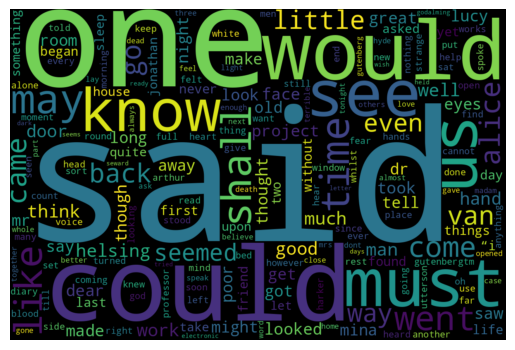

In [ ]:
# Create a WordCloud object with the frequency information
wordcloud = WordCloud(width=1200, height=800).generate_from_frequencies(word_freq_dict)

# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The most prominent word observed from the word cloud is 'said'. This is highly due to the source of raw text. In this context, the raw text originated from three story books/novels. It is quite common that contents of books have lots of dialogues. In fact, dialogue is a critical part of any story. Hence, this explains why the word 'said' stands out in this word cloud.

Example :
## The blood is life... And it shall be mine... **said** Dracula

From the word cloud plot, we can also see that 'Alice' has been frequently repeated. This is because one of the selected books is Alice in Wonderland.

## **Compute the Sparcity**

---




In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a list of documents
documents = [' '.join([word] * freq) for word, freq in word_freq_dict.items()]

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the documents to create the DTM
dtm = vectorizer.fit_transform(documents)

sparsity = (1.0 - (dtm.nnz / (dtm.shape[0] * dtm.shape[1])))*100
print("Sparsity:", sparsity)


Sparsity: 99.99197362523921


# **Conclusion**


---

Sparsity refers to the proportion of zero or non-existent elements in a dataset or matrix.

The computed sparcity for the 3 books matrix is very high.

This can be further confirmed by calculating the sparcity of the three books from document term matrix. Sparsity refers to the proportion of zero or non-existent elements in a dataset or matrix and in this case, the computed sparsity is very high 99.996%.

A high sparcity matrix tells us that the majority of words in the three books occur infrequently or not at all.